In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def int_cuadrada_trapecio(f,a,b):
    N = len(f)-1
    assert a<b
    Delta = (b-a)/N
    x_i = np.linspace(a,b,N+1)
    # f tiene que ser una función vectorizada
    f_xi = f
    # estimación media excluye el último punto
    area = (0.5*f_xi[0]+np.sum(f_xi[1:-1])+0.5*f_xi[-1])*Delta
    return area
def int_cuadrada_trapecio_ASIM(x,f):
    assert len(x)==len(f)
    N = len(f)-1
    # f tiene que ser una función vectorizada
    f_xi = f
    # estimación media excluye el último punto
    area = 0
    for it in range(N):
        area += 0.5*(f_xi[it]+f_xi[it+1])*(x[it+1]-x[it])
    return area
def int_simpson(f,a,b): # optimizar al finalizar si es posible
    N = len(f)-1
    assert N%2==0
    assert a<b
    u2_3 = 2/3
    u4_3 = 4/3
    x_i = np.linspace(a,b,N+1)
    delta = (b-a)/N
    f_xi = f
    f_xi[0] /=2; f_xi[-1] /=2
    area = delta*np.sum([
        (u2_3*f_ if index[0]%2==0 else u4_3*f_)
        for index,f_ in np.ndenumerate(f_xi)
    ])
    return area

# Señal Triangular

In [3]:
def triangul(x,A,a,T=1,x0=0,center=1/2): # Senhal triangular de periodo 1 y definida solo entre 0 y 1
    # T va a ser el periodo
    assert T > 0
    # center no puede tomar valores inferiores a 0 o mayores a 1
    assert center >= 0 and center <= 1
    # x0 es la fase
    assert a>0 and a<=1
    assert A!=0
    # x'=x-x0 debe ser un valor entre 0 y T*a
    xprima = x-x0
    # toda funcion periodica f(t+T) = f(t).
    xprima = (xprima + T) % T
    return (A*xprima/(T*a) if xprima <= T*a else A*(1-(xprima-T*a)/(T*(1-a)))) - A*center
triangul=np.vectorize(triangul,excluded=[1,2,3,4,5])

In [4]:
t = np.linspace(0,6,1001)-3

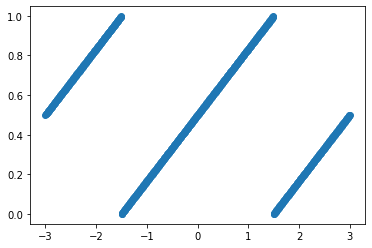

In [5]:
plt.scatter(t,triangul(t,A=1,a=1,T=3,x0=1.5,center=0))

In [6]:
def SFourier(y,T,kMax=10):
    # y tiene un numero determinado de datos
    N = len(y)
    t = np.linspace(0,T,N)
    a = []
    b = []
    for k in range(kMax+1):
        wk = 2*np.pi*k/T
        # Usando la función de integración de trapecio con intervalos uniformes
        ak = (2/T)*int_cuadrada_trapecio(y*np.cos(wk*t),0,T)
        bk = (2/T)*int_cuadrada_trapecio(y*np.sin(wk*t),0,T)
        a.append(ak)
        b.append(bk)
    return a,b
def SFourier_ASIM(t,y,kMax=10):
    T = t.max()-t.min()
    # y tiene un numero determinado de datos
    assert len(t)==len(y)
    a = []
    b = []
    for k in range(kMax+1):
        wk = 2*np.pi*k/T
        # Usando la función de integración de trapecio con intervalos no uniformes
        ak = (2/T)*int_cuadrada_trapecio_ASIM(t,y*np.cos(wk*t))
        bk = (2/T)*int_cuadrada_trapecio_ASIM(t,y*np.sin(wk*t))
        a.append(ak)
        b.append(bk)
    return a,b

In [44]:
T = 3
N = 100
t = np.linspace(0,T,N+1)
# res_a,res_b = SFourier(triangul(t,A=1,a=1,T=T,x0=1.5,center=0),T,kMax=500)
res_a,res_b = SFourier_ASIM(t,triangul(t,A=1,a=1,T=T,x0=1.5,center=0),kMax=500)

In [48]:
len(res_a[:])

501

<BarContainer object of 101 artists>

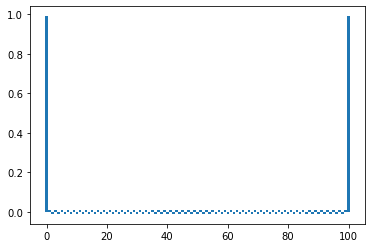

In [50]:
plt.bar(np.arange(100+1),res_a[:101])

<BarContainer object of 101 artists>

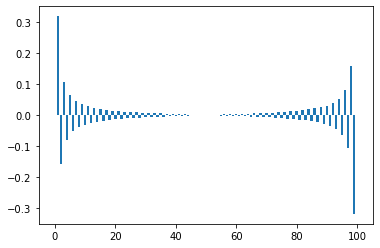

In [52]:
plt.bar(np.arange(100+1),res_b[:101])

In [11]:
def invSFourier(t,a,b,T):
    assert len(a) == len(b)
    Sa = 0
    Sb = 0
    for it in range(len(a)):
        if it > 0:
            wk = 2*np.pi*it/T
            Sa += a[it]*np.cos(wk*t)
            Sb += b[it]*np.sin(wk*t)
    return a[0]/2 + Sa + Sb
invTFourierV = np.vectorize(invSFourier,excluded=[1,2,3])
def invSFourier_ASIM(t,a,b,T):
    assert len(a) == len(b)
    assert T > 0
    Sa = 0
    Sb = 0
    for it in range(len(a)):
        if it > 0:
            wk = 2*np.pi*it/T
            Sa += a[it]*np.cos(wk*t)
            Sb += b[it]*np.sin(wk*t)
    return a[0]/2 + Sa + Sb
invTFourier_ASIMV = np.vectorize(invSFourier_ASIM,excluded=[1,2,3])

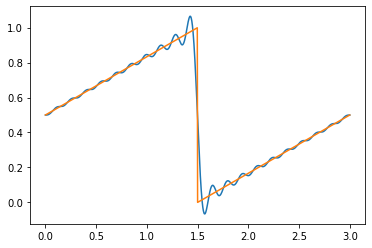

In [12]:
T = 3
N = 1000
t = np.linspace(0,T,N+1)
# plt.plot(t,invSFourier(t,res_a[:21],res_b[:21],T))
plt.plot(t,invSFourier_ASIM(t,res_a[:21],res_b[:21],T))
plt.plot(t,triangul(t,A=1,a=1,T=T,x0=1.5,center=0))

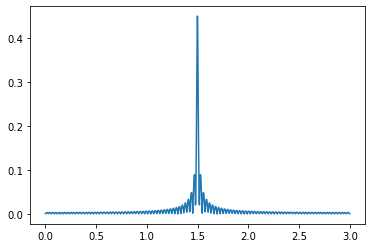

In [13]:
# plt.plot(t,np.abs(triangul(t,A=1,a=1,T=T,x0=1.5,center=0)-invSFourier(t,res_a[:51],res_b[:51],T)))
plt.plot(t,np.abs(triangul(t,A=1,a=1,T=T,x0=1.5,center=0)-invSFourier_ASIM(t,res_a[:51],res_b[:51],T)))

# Transformación de funciones no lineales y no "periódicas"

In [119]:
print("Nuestra caja experimental!")
a = 3/2
b = 4
c = -3
N=100
x = np.linspace(0.2,10,N)
y = a/(1+np.exp(c*(x-b)))
x1 = x + np.random.exponential(0.01,size=N)
y1 = y + np.random.normal(0,0.05,size=N)

Nuestra caja experimental!


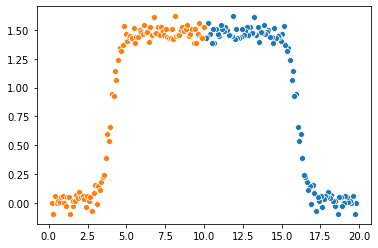

In [120]:
sns.scatterplot(-x1+20,y1)
sns.scatterplot(x1,y1)

# Filtramos los puntos tales que $x<3\,\wedge\,x>5$

In [121]:
y1 = np.concatenate((y1[x1<3],y1[x1>5]))
x1 = np.concatenate((x1[x1<3],x1[x1>5]))

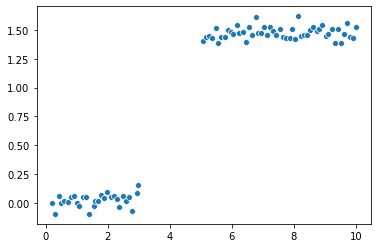

In [122]:
sns.scatterplot(x1,y1)
# sns.scatterplot(-x1+20,y1)

In [123]:
# la lista complementaria de x1
x1M = x1[x1<4].max() # maximo para los menores que 4
x1m = x1[x1>4].min() # minimo para los mayores que 4
x1c = np.linspace(x1[x1<4].max(),x1[x1>4].min(),1000)
y1c = np.linspace(y1[x1==x1M].max(),y1[x1==x1m].max(),1000)

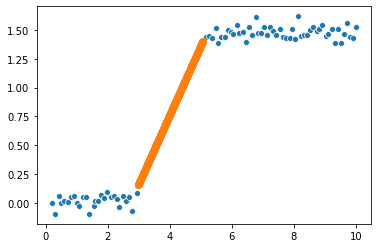

In [125]:
sns.scatterplot(x1,y1)
plt.scatter(x1c,y1c)

In [126]:
x1 = np.concatenate((x1,x1c))
idx = np.argsort(x1)
x1 = x1[idx]
y1 = np.concatenate((y1,y1c))
y1 = y1[idx]

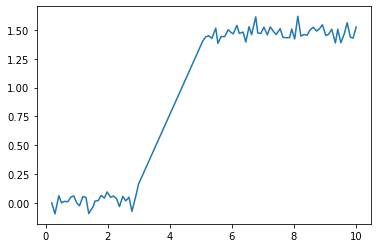

In [128]:
plt.plot(x1,y1)

# Describir y1 vs x1 como una funcion de x1 que sea suave
$$y_1=f(x_1)\simeq\frac{a_0}{2}+\sum_{j=0}^{N_{cutoff}}\left[a_k\cos\omega_k x_1+b_k\sin\omega_k x_1\right]$$

In [129]:
res_a,res_b = SFourier_ASIM(x1,y1,kMax=50)

In [130]:
deltat = x1[1:]-x1[:-1]
kmax = 10/(2*deltat.max())
kmax

31.54508534573764

<BarContainer object of 51 artists>

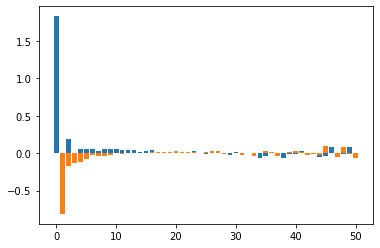

In [131]:
plt.bar(np.arange(50+1),res_a[:51])
plt.bar(np.arange(50+1),res_b[:51])

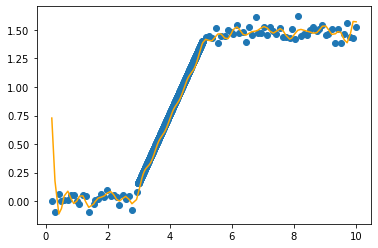

In [133]:
n = 20
plt.scatter(x1,y1)
plt.plot(x1,invSFourier_ASIM(x1,res_a[:n+1],res_b[:n+1],10),color='orange')

# Ahora intentemos hacer el filtro pero usando los datos y su imagen para evitar la discontinuidad en $10$

In [134]:
x1p = np.concatenate((x1,-x1+20))
idx = np.argsort(x1p)
x1p = x1p[idx]
y1p = np.concatenate((y1,y1))
y1p = y1p[idx]

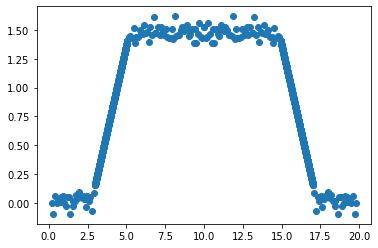

In [135]:
plt.scatter(x1p,y1p)

In [136]:
res_a,res_b = SFourier_ASIM(x1p,y1p,kMax=50)

<BarContainer object of 51 artists>

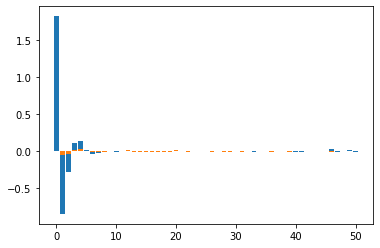

In [137]:
plt.bar(np.arange(50+1),res_a[:51])
plt.bar(np.arange(50+1),res_b[:51])

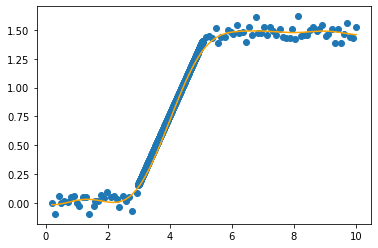

In [138]:
n = 10
plt.scatter(x1,y1)
plt.plot(x1,invSFourier_ASIM(x1,res_a[:n+1],res_b[:n+1],T=2*10),color='orange')